<a href="https://colab.research.google.com/github/knightlover4/Vehicle-Insurance-Policy-Prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=2159cfcd5efbb0c5c72890c8dc8fcc05cc33580ad642c9a12b4ffdd2a42ead25
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
#Import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandasql as psql
pd.set_option('display.max_columns',None)

In [3]:
#Import the dataset
a=pd.read_csv(r'/content/drive/MyDrive/Internship/AutoInsurance.csv',header=0)
a1=a.copy()
a.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Info of the dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#Check if any null or missing values are present
a.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


In [6]:
#Check if any duplicate values are present
adp=a[a.duplicated(keep='last')]
adp

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [7]:
a.Response.value_counts()

,count
Response,
No,7826
Yes,1308


In [8]:
a.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
a['Response']=l.fit_transform(a['Response'])
a['State']=l.fit_transform(a['State'])
a['Gender']=l.fit_transform(a['Gender'])
a['Coverage']=l.fit_transform(a['Coverage'])
a['Education']=l.fit_transform(a['Education'])
a['EmploymentStatus']=l.fit_transform(a['EmploymentStatus'])
a['Location Code']=l.fit_transform(a['Location Code'])
a['Marital Status']=l.fit_transform(a['Marital Status'])
a['Policy Type']=l.fit_transform(a['Policy Type'])
a['Policy']=l.fit_transform(a['Policy'])
a['Renew Offer Type']=l.fit_transform(a['Renew Offer Type'])
a['Sales Channel']=l.fit_transform(a['Sales Channel'])
a['Vehicle Class']=l.fit_transform(a['Vehicle Class'])
a['Vehicle Size']=l.fit_transform(a['Vehicle Size'])

In [10]:
rc=a.Response.value_counts()
print('Class 0: ',rc[0])
print('Class 1: ',rc[1])
print('Proportion: ',round(rc[0]/rc[1],2),':1')
print('Total claims: ',len(rc))

Class 0:  7826
Class 1:  1308
Proportion:  5.98 :1
Total claims:  2


In [11]:
#Delete unnecessary or noise columns

del a['Customer']
del a['Effective To Date']

In [12]:
a.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [13]:
a.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [14]:
col=['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Total Claim Amount']

In [15]:
IV=[]
TV='Response'
for i in a.columns:
  if i!=TV:
    IV.append(i)
x=a[IV]
y=a[TV]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6393, 21), (2741, 21), (6393,), (2741,))

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train[col]=mm.fit_transform(x_train[col])
x_train=pd.DataFrame(x_train)
x_test[col]=mm.fit_transform(x_test[col])
x_test=pd.DataFrame(x_test)

In [18]:
a.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


# Comparison of classification models

In [19]:
EMResults=pd.read_csv(r'/content/drive/MyDrive/Internship/EMResults.csv',header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[2332    0]
 [ 409    0]]
Outcome values : 
 2332 0 409 0
Classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2332
           1       0.00      0.00      0.00       409

    accuracy                           0.85      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.72      0.85      0.78      2741

Accuracy : 85.1 %
Precision : 85.1 %
Recall : 100.0 %
F1 Score : 0.919
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
ROC AUC Score: 0.5


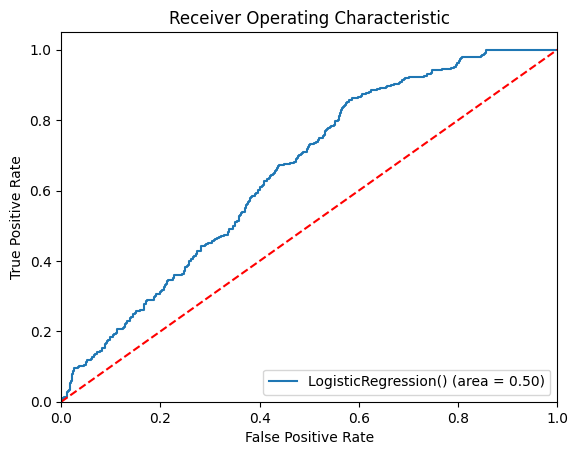

Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[2238   94]
 [  90  319]]
Outcome values : 
 2238 94 90 319
Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2332
           1       0.77      0.78      0.78       409

    accuracy                           0.93      2741
   macro avg       0.87      0.87      0.87      2741
weighted avg       0.93      0.93      0.93      2741

Accuracy : 93.3 %
Precision : 96.1 %
Recall : 96.0 %
F1 Score : 0.961
Specificity or True Negative Rate : 78.0 %
Balanced Accuracy : 87.0 %
MCC : 0.737
ROC AUC Score: 0.87


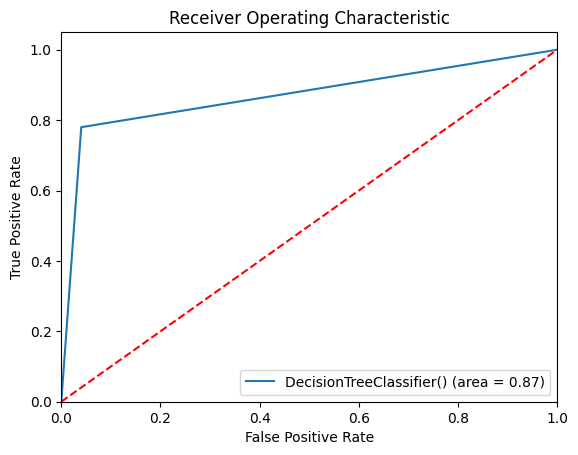

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[2329    3]
 [  39  370]]
Outcome values : 
 2329 3 39 370
Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2332
           1       0.99      0.90      0.95       409

    accuracy                           0.98      2741
   macro avg       0.99      0.95      0.97      2741
weighted avg       0.98      0.98      0.98      2741

Accuracy : 98.5 %
Precision : 98.4 %
Recall : 99.9 %
F1 Score : 0.991
Specificity or True Negative Rate : 90.5 %
Balanced Accuracy : 95.2 %
MCC : 0.939
ROC AUC Score: 0.952


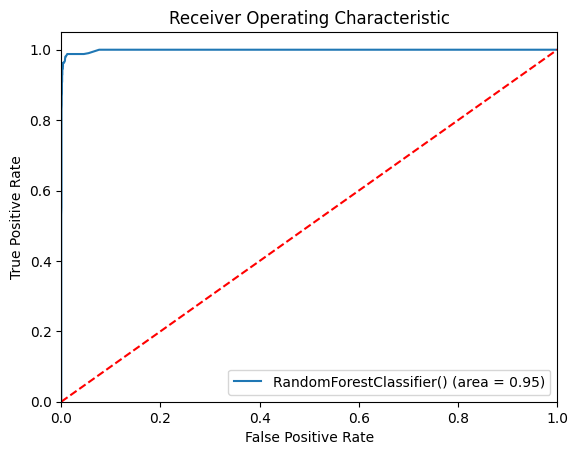

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[2331    1]
 [   8  401]]
Outcome values : 
 2331 1 8 401
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2332
           1       1.00      0.98      0.99       409

    accuracy                           1.00      2741
   macro avg       1.00      0.99      0.99      2741
weighted avg       1.00      1.00      1.00      2741

Accuracy : 99.7 %
Precision : 99.7 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 99.0 %
MCC : 0.987
ROC AUC Score: 0.99


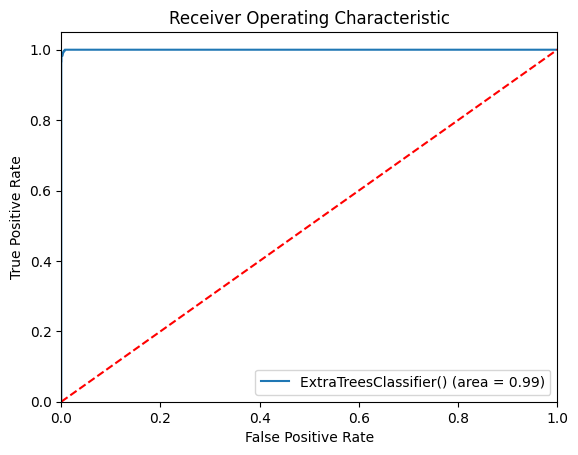

Model Name:  GaussianNB()
Confusion matrix : 
 [[2294   38]
 [ 390   19]]
Outcome values : 
 2294 38 390 19
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2332
           1       0.33      0.05      0.08       409

    accuracy                           0.84      2741
   macro avg       0.59      0.52      0.50      2741
weighted avg       0.78      0.84      0.79      2741

Accuracy : 84.4 %
Precision : 85.5 %
Recall : 98.4 %
F1 Score : 0.915
Specificity or True Negative Rate : 4.6 %
Balanced Accuracy : 51.5 %
MCC : 0.075
ROC AUC Score: 0.515


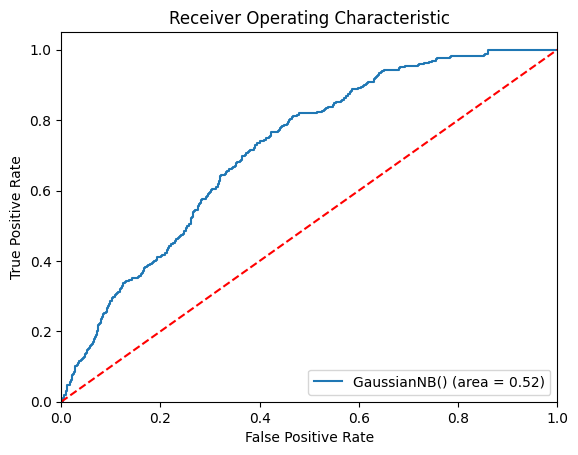

-----------------------------------------------------------------------------------------------------
                 Model Name True_Positive False_Negative False_Positive  \
0      LogisticRegression()          2332              0            409   
1  DecisionTreeClassifier()          2238             94             90   
2  RandomForestClassifier()          2329              3             39   
3    ExtraTreesClassifier()          2331              1              8   
4              GaussianNB()          2294             38            390   

  True_Negative  Accuracy  Precision  Recall  F1 Score  Specificity    MCC  \
0             0     0.851      0.851   1.000     0.919        0.000    NaN   
1           319     0.933      0.961   0.960     0.961        0.780  0.737   
2           370     0.985      0.984   0.999     0.991        0.905  0.939   
3           401     0.997      0.997   1.000     0.998        0.980  0.987   
4            19     0.844      0.855   0.984     0.915   

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from math import sqrt
import pandas as pd

# Initialize DataFrame to store results
EMResults = pd.DataFrame(columns=['Model Name', 'True_Positive', 'False_Negative', 'False_Positive',
                                  'True_Negative', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
                                  'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'])

# Create objects of classification algorithms with default hyperparameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelGNB = GaussianNB()

# List of models to evaluate
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelGNB]

# Loop through each model
for model in MM:
    # Fit the model
    model.fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Print the model name
    print('Model Name: ', model)

    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print('Confusion matrix : \n', matrix)

    # Calculate tp, fn, fp, tn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    print('Outcome values : \n', tp, fn, fp, tn)

    # Classification report
    C_Report = classification_report(y_test, y_pred)
    print('Classification report : \n', C_Report)

    # Calculate metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1_score = round((2 * tp) / (2 * tp + fp + fn), 3)

    # Calculate MCC
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    # Print metrics
    print('Accuracy :', round(accuracy * 100, 2), '%')
    print('Precision :', round(precision * 100, 2), '%')
    print('Recall :', round(sensitivity * 100, 2), '%')
    print('F1 Score :', f1_score)
    print('Specificity or True Negative Rate :', round(specificity * 100, 2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy * 100, 2), '%')
    print('MCC :', MCC)

    # Calculate and print ROC AUC score
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)
    print('ROC AUC Score:', roc_auc)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Create a new row as a DataFrame
    new_row = pd.DataFrame({
        'Model Name': [str(model)],
        'True_Positive': [tp],
        'False_Negative': [fn],
        'False_Positive': [fp],
        'True_Negative': [tn],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [sensitivity],
        'F1 Score': [f1_score],
        'Specificity': [specificity],
        'MCC': [MCC],
        'ROC_AUC_Score': [roc_auc],
        'Balanced Accuracy': [balanced_accuracy]
    })

    # Use pd.concat instead of append
    EMResults = pd.concat([EMResults, new_row], ignore_index=True)

print('-----------------------------------------------------------------------------------------------------')
print(EMResults)


# Model Selection

In [25]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),2332,0,409,0,0.851,0.851,1.000,0.919,0.000,NaN,0.500,0.500
1,DecisionTreeClassifier(),2238,94,90,319,0.933,0.961,0.960,0.961,0.780,0.737,0.870,0.870
2,RandomForestClassifier(),2329,3,39,370,0.985,0.984,0.999,0.991,0.905,0.939,0.952,0.952
3,ExtraTreesClassifier(),2331,1,8,401,0.997,0.997,1.000,0.998,0.980,0.987,0.990,0.990
4,GaussianNB(),2294,38,390,19,0.844,0.855,0.984,0.915,0.046,0.075,0.515,0.515


In [26]:
y_pred1=ModelET.predict(x_test)#ModelET

# Result

In [28]:
Results = pd.DataFrame({'Response_A':y_test, 'Response_P':y_pred1})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = a1.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Response_A,Response_P
1349,SC93784,Oregon,5510.107444,No,Basic,Bachelor,10/1/2011,Employed,M,61401,Rural,Married,69,8,77,0,3,Personal Auto,Personal L2,Offer1,Call Center,144.439335,Four-Door Car,Medsize,0,0
3615,AP66226,Nevada,4479.494223,No,Basic,Bachelor,10/2/2011,Medical Leave,M,18505,Suburban,Married,66,15,51,4,3,Personal Auto,Personal L3,Offer1,Web,316.800000,Four-Door Car,Medsize,0,0
7269,NY30370,Washington,2618.326183,No,Basic,High School or Below,1/17/11,Employed,M,28663,Suburban,Married,66,23,34,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,430.604489,Two-Door Car,Medsize,0,0
6478,VE87035,Oregon,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,25998,Suburban,Married,71,16,38,0,2,Personal Auto,Personal L3,Offer2,Call Center,791.878042,Four-Door Car,Medsize,1,1
26,US89481,California,3946.372085,No,Premium,Bachelor,2/28/11,Unemployed,F,0,Suburban,Single,111,15,47,0,1,Personal Auto,Personal L3,Offer1,Agent,799.200000,Four-Door Car,Small,0,0


In [29]:
ResultsFinal.sample(30)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Response_A,Response_P
5598,QD97878,Nevada,4419.116971,No,Premium,Master,2/21/11,Medical Leave,M,24046,Suburban,Married,116,27,47,0,1,Personal Auto,Personal L2,Offer4,Agent,556.800000,Two-Door Car,Small,0,0
6876,BN38134,Washington,6727.617003,No,Extended,Bachelor,7/1/2011,Employed,F,39428,Rural,Married,84,19,80,2,8,Personal Auto,Personal L3,Offer2,Branch,72.329260,Two-Door Car,Large,0,0
1302,BU41599,Washington,5581.761298,No,Basic,Master,2/28/11,Employed,F,62739,Urban,Divorced,70,29,80,0,3,Personal Auto,Personal L1,Offer2,Call Center,239.328571,Two-Door Car,Medsize,0,0
2907,ID21061,Arizona,7291.599536,No,Extended,Master,4/2/2011,Employed,F,84629,Urban,Married,90,19,17,0,5,Personal Auto,Personal L3,Offer2,Web,411.671832,Four-Door Car,Large,0,0
8085,MF87270,California,2952.581331,No,Basic,High School or Below,2/15/11,Employed,F,57248,Suburban,Married,74,31,17,0,1,Personal Auto,Personal L3,Offer2,Call Center,355.200000,Four-Door Car,Small,0,0
4398,KT46283,California,4686.469674,Yes,Basic,College,12/2/2011,Employed,M,58089,Suburban,Married,118,31,83,0,1,Corporate Auto,Corporate L1,Offer1,Agent,566.400000,SUV,Medsize,1,1
101,AB96670,California,2393.915369,Yes,Basic,College,1/31/11,Unemployed,M,0,Suburban,Single,70,24,10,0,1,Personal Auto,Personal L1,Offer1,Branch,425.266308,Four-Door Car,Medsize,1,1
1729,TY43440,California,8819.018934,Yes,Basic,High School or Below,10/1/2011,Employed,M,99845,Suburban,Married,110,23,25,1,8,Personal Auto,Personal L3,Offer2,Branch,528.000000,SUV,Medsize,1,1
4245,YR45605,Oregon,2413.888405,No,Basic,Bachelor,10/1/2011,Unemployed,F,0,Suburban,Single,68,6,35,0,1,Personal Auto,Personal L2,Offer3,Web,379.209349,Four-Door Car,Medsize,0,0
2835,JB36584,Arizona,14333.924890,No,Basic,Master,4/2/2011,Employed,M,41459,Suburban,Married,71,8,4,0,2,Personal Auto,Personal L3,Offer2,Call Center,340.800000,Four-Door Car,Medsize,0,0


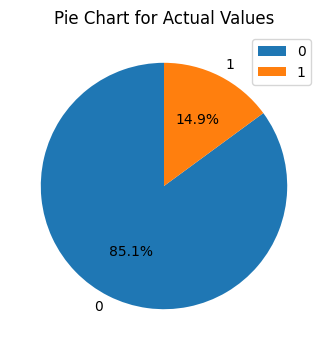

None


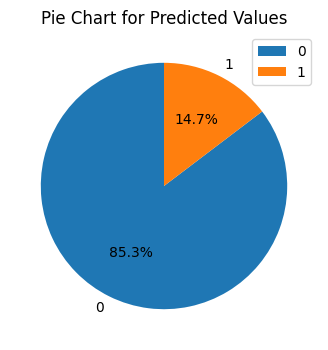

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the data for the column you want to plot
column_to_plot = 'Response_A'
values = ResultsFinal[column_to_plot].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: Set the figure size
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)

# Optional: Add a title to the pie chart
plt.title(f'Pie Chart for Actual Values')

# Optional: Add legend
plt.legend()

# Display the pie chart
print(plt.show())

column_to_plot = 'Response_P'
values = ResultsFinal[column_to_plot].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: Set the figure size
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)

# Optional: Add a title to the pie chart
plt.title(f'Pie Chart for Predicted Values')

# Optional: Add legend
plt.legend()

# Display the pie chart
plt.show()
